In [16]:
## importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

In [17]:
reports_dir = '/content/reports'
os.makedirs(reports_dir, exist_ok=True)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Analytics Project/Food_Production.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [19]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Shape: (43, 23)

Columns: ['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail', 'Total_emissions', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)', 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)', 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', 'Land use per 1000kcal (m² per 1000kcal)', 'Land use per kilogram (m² per kilogram)', 'Land use per 100g protein (m² per 100g protein)', 'Scarcity-weighted water use per kilogram (liters per kilogram)', 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 'Scarcity-weighted water use per 1000kcal (liters 

## EDA

In [20]:

print("Dataset info:")
print(df.info())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                      

In [21]:

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal 

In [22]:

key_cols = [
    "Total_emissions",
    "Farm",
    "Land use per kilogram (m² per kilogram)",
    "Freshwater withdrawals per kilogram (liters per kilogram)",
    "Scarcity-weighted water use per kilogram (liters per kilogram)",
    "Land use change",
    "Animal Feed"
]

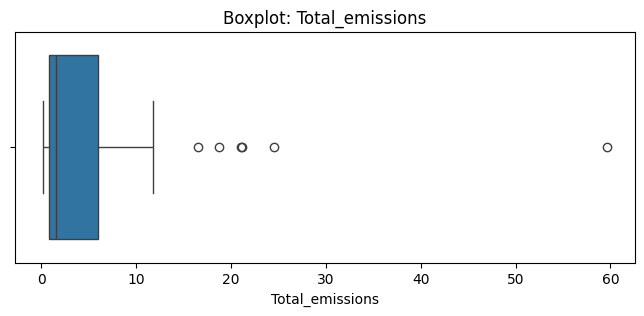

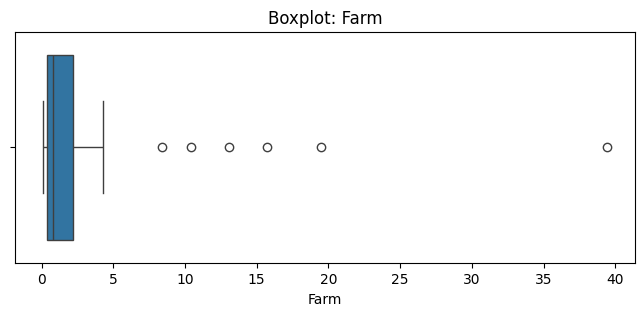

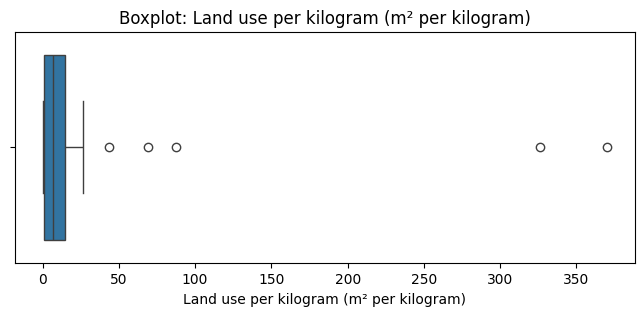

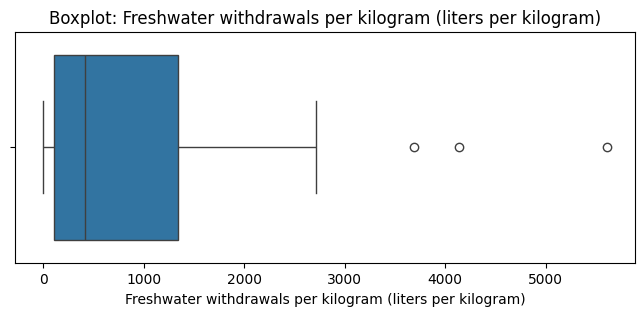

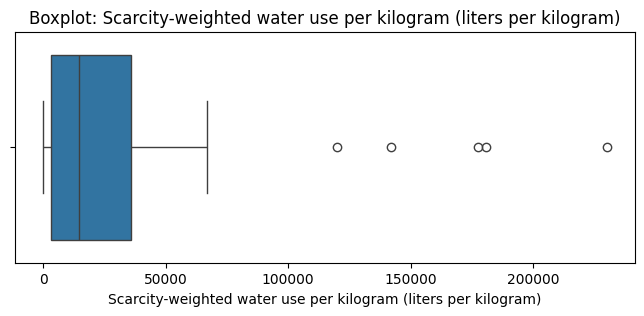

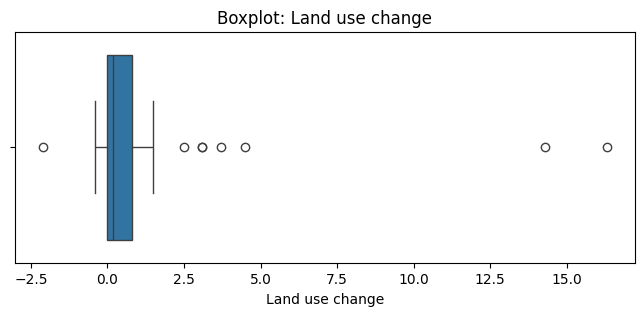

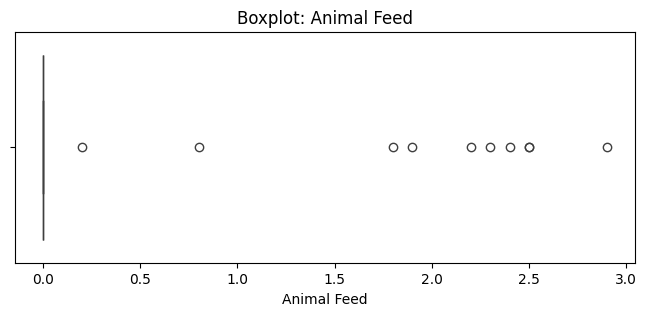

In [23]:

for col in key_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot: {col}")
    plt.xlabel(col)
    fname = col.replace(" ", "_").replace("/", "_")[:80] + ".png"
    plt.savefig(os.path.join(reports_dir, f"box_{fname}"), bbox_inches='tight')
    plt.show()

In [24]:

print("\nSummary statistics:")
print(df.describe().T)


Summary statistics:
                                                    count          mean  \
Land use change                                      43.0      1.260465   
Animal Feed                                          43.0      0.453488   
Farm                                                 43.0      3.469767   
Processing                                           43.0      0.253488   
Transport                                            43.0      0.195349   
Packging                                             43.0      0.269767   
Retail                                               43.0      0.069767   
Total_emissions                                      43.0      5.972093   
Eutrophying emissions per 1000kcal (gPO₄eq per ...   33.0     27.181547   
Eutrophying emissions per kilogram (gPO₄eq per ...   38.0     46.141316   
Eutrophying emissions per 100g protein (gPO₄eq ...   27.0     52.771953   
Freshwater withdrawals per 1000kcal (liters per...   30.0    504.188977   
Fres

In [25]:

df_clean = df.copy()




In [26]:
df_clean.columns = (
    df_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("₄", "4")  # replace subscript if needed
    .str.replace("₂", "2")
    .str.replace("₃", "3")
    .str.replace("packging", "packaging")  # fix typo
)




In [27]:


num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].applymap(lambda x: np.nan if x < 0 else x)



In [28]:

water_cols = [col for col in df_clean.columns if "water" in col]
for col in water_cols:

    df_clean[col] = df_clean[col].replace(0, np.nan)



In [29]:

print("Negative values fixed, suspicious zeros in water columns replaced with NaN")
print(df_clean.describe().T[["min", "max"]].head(10))

Negative values fixed, suspicious zeros in water columns replaced with NaN
                                                         min         max
land_use_change                                     0.000000   16.300000
animal_feed                                         0.000000    2.900000
farm                                                0.100000   39.400000
processing                                          0.000000    1.300000
transport                                           0.000000    0.800000
packaging                                           0.000000    1.600000
retail                                              0.000000    0.300000
total_emissions                                     0.200000   59.600000
eutrophying_emissions_per_1000kcal_(gpo4eq_per_...  0.708419  197.357143
eutrophying_emissions_per_kilogram_(gpo4eq_per_...  0.690000  365.290000


### Which food products contribute the most to total greenhouse gas emissions?


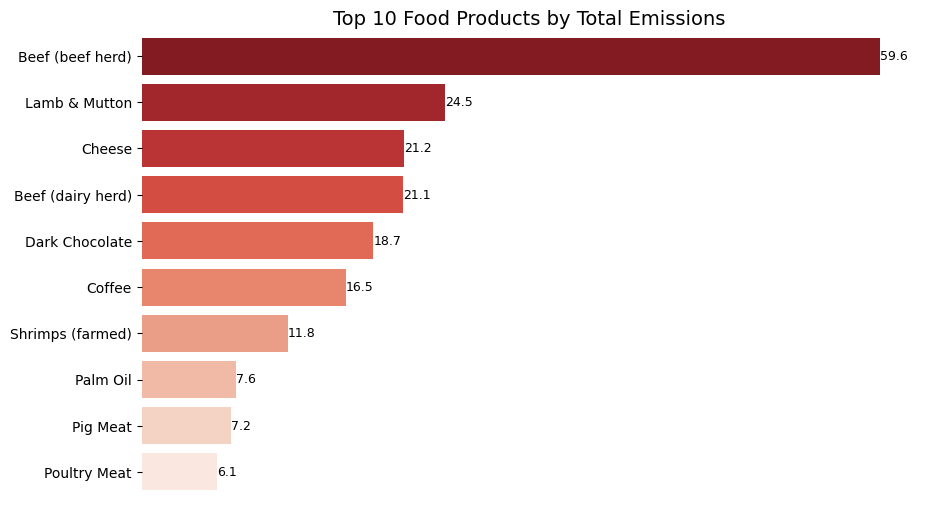

In [30]:

top_emitters = (
    df_clean[['food_product', 'total_emissions']]
    .sort_values(by='total_emissions', ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_emitters, x='total_emissions', y='food_product', palette='Reds_r')
plt.title("Top 10 Food Products by Total Emissions", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=9)


ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])

sns.despine(left=True, bottom=True)

plt.show()



### Insight

- Beef (beef herd) is by far the largest contributor to emissions (59.6), more than double the next item, Lamb & Mutton (24.5). Other high-impact foods include Cheese (21.2) and Beef from dairy herds (21.1), showing that livestock products dominate the top emission sources. Interestingly, some plant-based foods like Dark Chocolate (18.7) and Coffee (16.5) also feature in the top 10, highlighting that not only animal products but also certain crops can carry significant environmental costs. By contrast, Pig Meat (7.2) and Poultry Meat (6.1) have much lower emissions, making them relatively more sustainable animal protein options.

### What share of emissions comes from animal-based vs. plant-based foods?

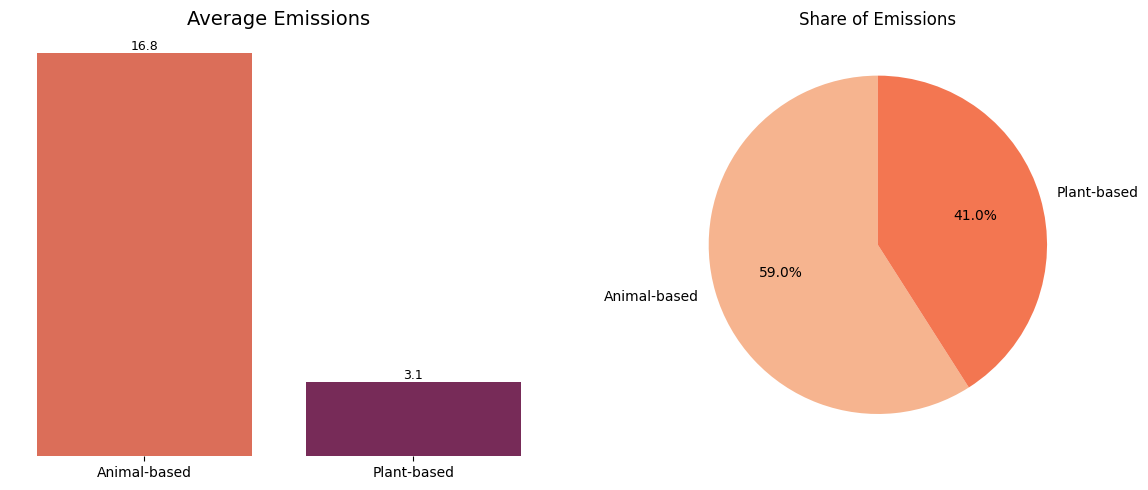

In [31]:


animal_keywords = ['Beef','Lamb','Pork','Chicken','Fish','Eggs','Milk','Cheese','Shrimp','Prawns']
df_clean['category'] = df_clean['food_product'].apply(
    lambda x: 'Animal-based' if any(word.lower() in x.lower() for word in animal_keywords) else 'Plant-based'
)


category_summary = df_clean.groupby('category')['total_emissions'].mean().reset_index()
category_share = (
    df_clean.groupby('category')['total_emissions']
    .sum()
    .reset_index()
    .sort_values(by='total_emissions', ascending=False)
)

fig, axes = plt.subplots(1, 2, figsize=(12,5))


ax1 = sns.barplot(data=category_summary, x='category', y='total_emissions', palette='rocket_r', ax=axes[0])
ax1.set_title("Average Emissions", fontsize=14)
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f", fontsize=9)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_yticks([])
sns.despine(ax=ax1, left=True, bottom=True)

axes[1].pie(
    category_share['total_emissions'],
    labels=category_share['category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("rocket_r")
)
axes[1].set_title("Share of Emissions")
axes[1].set_frame_on(False)

plt.tight_layout()
plt.show()


#### Insight

 - Animal-based foods account for the majority of emissions (59%) and are, on average, over five times more emission-intensive than plant-based foods (16.8 vs 3.1 units). This means they not only dominate total emissions but also have the highest environmental cost per item, making them the least efficient choice environmentally.

#### What stages of the food supply chain are the largest drivers of emissions, and how do these drivers differ between foods?

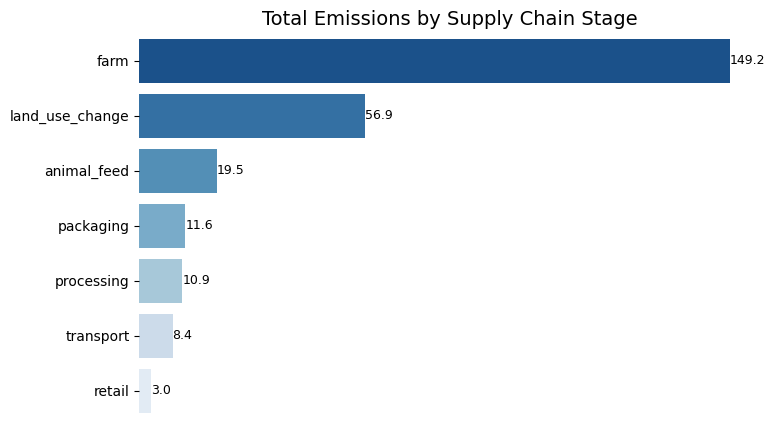

In [32]:

stage_cols = ['land_use_change', 'animal_feed', 'farm', 'processing', 'transport', 'packaging', 'retail']

stage_totals = df_clean[stage_cols].sum().reset_index()
stage_totals.columns = ['stage', 'total_emissions']

plt.figure(figsize=(8,5))
ax = sns.barplot(data=stage_totals.sort_values('total_emissions', ascending=False),
                 x='total_emissions', y='stage', palette='Blues_r')
plt.title("Total Emissions by Supply Chain Stage", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=9)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
sns.despine(left=True, bottom=True)

plt.show()


#### Insight
- Farm and land use change dominate emissions (~70–75%), while downstream stages (processing, transport, packaging, retail) are minor contributors, each <10% of total meaning the biggest climate impact comes from improving farm practices and land management.


### Which foods are the most land and water-intensive, and how do these environmental costs compare across food categories?

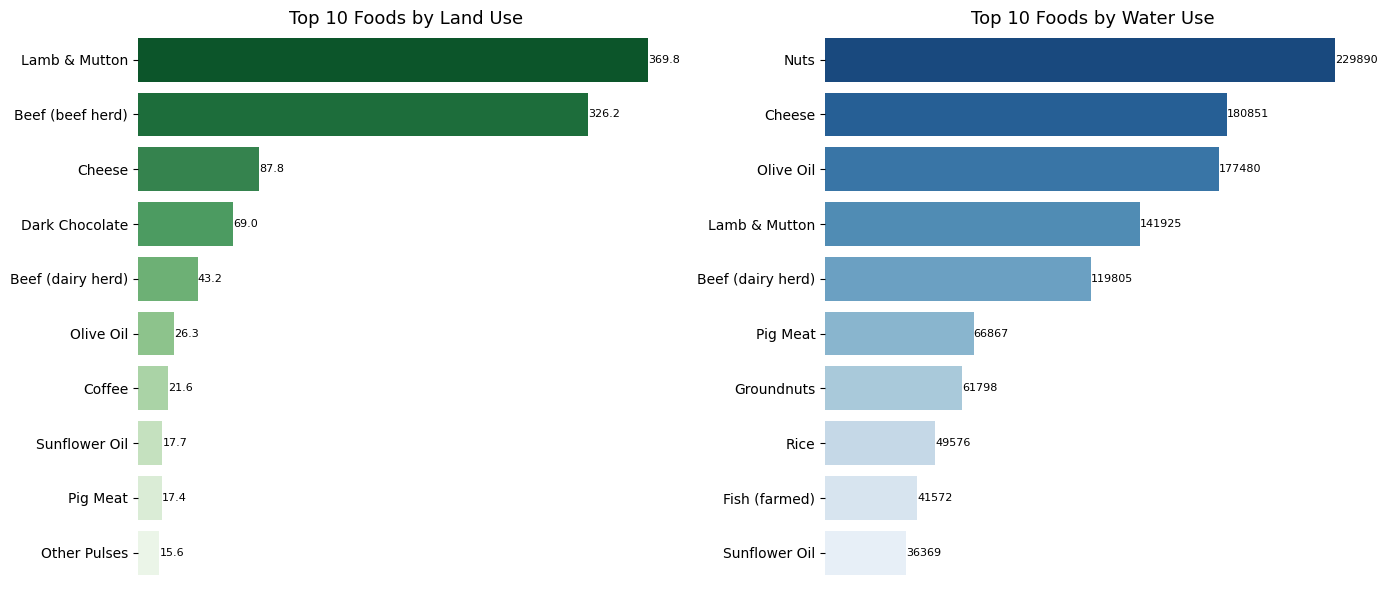

In [33]:

top_land = (
    df_clean[['food_product', 'land_use_per_kilogram_(m²_per_kilogram)']]
    .sort_values(by='land_use_per_kilogram_(m²_per_kilogram)', ascending=False)
    .head(10)
)


top_water = (
    df_clean[['food_product', 'scarcity-weighted_water_use_per_kilogram_(liters_per_kilogram)']]
    .sort_values(by='scarcity-weighted_water_use_per_kilogram_(liters_per_kilogram)', ascending=False)
    .head(10)
)


fig, axes = plt.subplots(1, 2, figsize=(14,6))

ax1 = sns.barplot(
    data=top_land,
    x='land_use_per_kilogram_(m²_per_kilogram)',
    y='food_product',
    palette='Greens_r',
    ax=axes[0]
)
ax1.set_title("Top 10 Foods by Land Use", fontsize=13)

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f", fontsize=8)

ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticks([])
sns.despine(left=True, bottom=True, ax=ax1)


ax2 = sns.barplot(
    data=top_water,
    x='scarcity-weighted_water_use_per_kilogram_(liters_per_kilogram)',
    y='food_product',
    palette='Blues_r',
    ax=axes[1]
)
ax2.set_title("Top 10 Foods by Water Use", fontsize=13)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.0f", fontsize=8)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_xticks([])
sns.despine(left=True, bottom=True, ax=ax2)

plt.tight_layout()
plt.show()


### Insight

- Land & water intensity hotspots: Lamb & beef dominate land use, while nuts, cheese, and olive oil are the most water-intensive, highlighting strong tradeoffs across animal and plant foods.

- Some foods (like Cheese, Olive Oil, Lamb, and Beef) appear on both lists, making them double hotspots for land and water intensity

### Which foods deliver the lowest environmental footprint per 100g of protein?

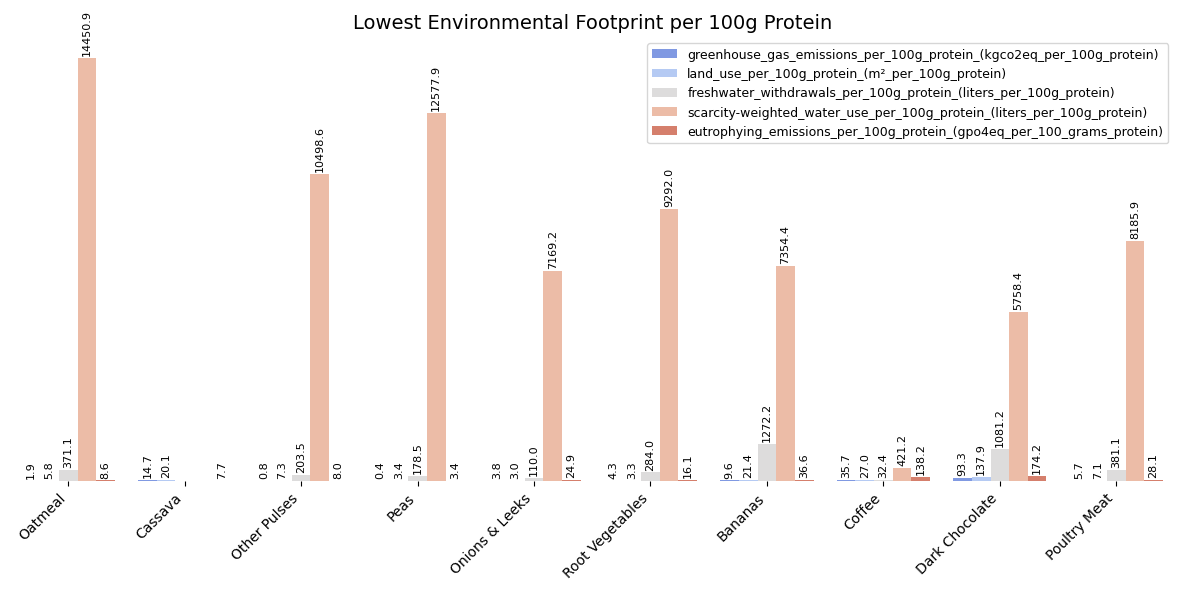

In [34]:

protein_cols = [
    'greenhouse_gas_emissions_per_100g_protein_(kgco2eq_per_100g_protein)',
    'land_use_per_100g_protein_(m²_per_100g_protein)',
    'freshwater_withdrawals_per_100g_protein_(liters_per_100g_protein)',
    'scarcity-weighted_water_use_per_100g_protein_(liters_per_100g_protein)',
    'eutrophying_emissions_per_100g_protein_(gpo4eq_per_100_grams_protein)'
]


protein_eff = df_clean[['food_product'] + protein_cols].melt(
    id_vars='food_product', var_name='impact_type', value_name='value'
)

lowest_protein = (
    protein_eff.groupby('food_product')['value']
    .mean()
    .nsmallest(10)
    .index
)
subset = protein_eff[protein_eff['food_product'].isin(lowest_protein)]

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=subset,
    x='food_product',
    y='value',
    hue='impact_type',
    palette='coolwarm'
)

plt.title("Lowest Environmental Footprint per 100g Protein", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=8, rotation=90, padding=2)


ax.set_xlabel("")
ax.set_ylabel("")
ax.set_yticks([])
sns.despine(left=True, bottom=True)

plt.xticks(rotation=45, ha="right")
plt.legend(title="", fontsize=9)
plt.tight_layout()
plt.show()


### Insight
- Plant-based foods like oatmeal, peas, onions, and root vegetables have significantly lower environmental footprints compared to animal-based products, particularly in terms of greenhouse gas emissions, land use, and water consumption. Foods such as poultry and red meat have much higher environmental costs, especially for land use and water. For more sustainable food choices, plant-based options are generally more eco-friendly across all environmental indicators.

### How do foods compare when adjusted for energy (per 1000 kcal) vs. protein content vs. per kilogram?

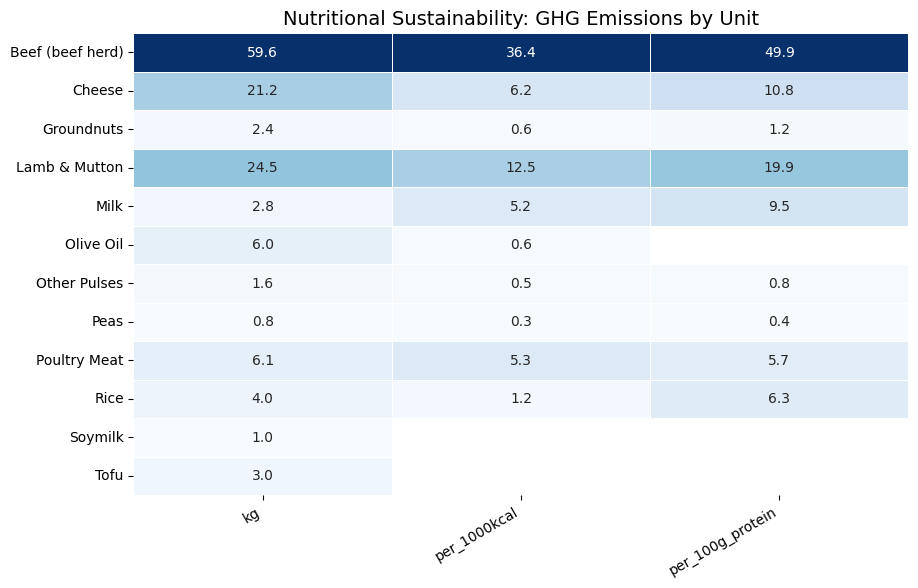

In [35]:


focus_foods = [
    'Beef (beef herd)', 'Lamb & Mutton', 'Poultry Meat', 'Cheese',
    'Milk', 'Tofu', 'Peas', 'Other Pulses', 'Soymilk',
    'Groundnuts', 'Rice', 'Wheat & Rye', 'Maize', 'Olive Oil'
]


nutritional_cols = {
    'kg': 'total_emissions',
    'per_100g_protein': 'greenhouse_gas_emissions_per_100g_protein_(kgco2eq_per_100g_protein)',
    'per_1000kcal': 'greenhouse_gas_emissions_per_1000kcal_(kgco2eq_per_1000kcal)'
}


nutritional_df = df_clean[df_clean['food_product'].isin(focus_foods)][['food_product'] + list(nutritional_cols.values())].copy()
nutritional_df = nutritional_df.rename(columns={v: k for k,v in nutritional_cols.items()})

melted = nutritional_df.melt(id_vars='food_product', var_name='basis', value_name='ghg_emissions')


heatmap_data = melted.pivot(index='food_product', columns='basis', values='ghg_emissions')


heatmap_norm = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_norm,
    annot=heatmap_data.round(1),
    fmt="",
    cmap="Blues",
    cbar=False,
    linewidths=0.5
)

plt.title("Nutritional Sustainability: GHG Emissions by Unit", fontsize=14)
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation=30, ha="right")
plt.show()


### Insight
- Beef and lamb have the highest greenhouse gas emissions, both per 1000 kcal and per 100g of protein. Cheese and poultry meat also have significant emissions. In contrast, groundnuts (peanuts), other pulses, tofu, and soymilk have much lower emissions, making them more sustainable options. Overall, plant-based foods are more eco-friendly compared to animal-based products in terms of GHG emissions.

### What are the best lower-impact substitutes within the dataset?

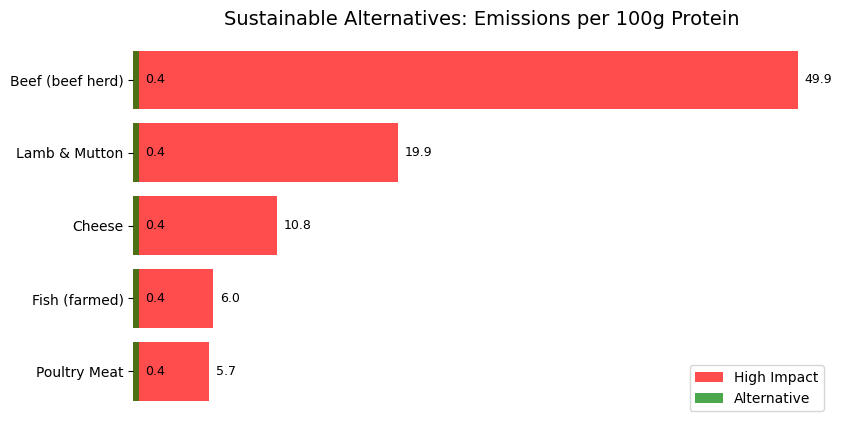

,High Impact Food,Impact (kgCO2eq/100g protein),Alternative,Alt Impact (kgCO2eq/100g protein)
0,Beef (beef herd),49.9,Peas,0.4
1,Lamb & Mutton,19.9,Peas,0.4
2,Cheese,10.8,Peas,0.4
3,Fish (farmed),6.0,Peas,0.4
4,Poultry Meat,5.7,Peas,0.4


In [41]:

subs_table = pd.DataFrame({
    "High Impact Food": ["Beef (beef herd)", "Lamb & Mutton", "Cheese", "Fish (farmed)", "Poultry Meat"],
    "Impact (kgCO2eq/100g protein)": [49.9, 19.9, 10.8, 6.0, 5.7],
    "Alternative": ["Peas", "Peas", "Peas", "Peas", "Peas"],
    "Alt Impact (kgCO2eq/100g protein)": [0.4, 0.4, 0.4, 0.4, 0.4]
})


subs_table_sorted = subs_table.sort_values(
    by="Impact (kgCO2eq/100g protein)", ascending=False
).reset_index(drop=True)

plt.figure(figsize=(9,5))

y_pos = range(len(subs_table_sorted))


plt.barh(
    y_pos,
    subs_table_sorted["Impact (kgCO2eq/100g protein)"],
    color="red",
    alpha=0.7,
    label="High Impact"
)


plt.barh(
    y_pos,
    subs_table_sorted["Alt Impact (kgCO2eq/100g protein)"],
    color="green",
    alpha=0.7,
    label="Alternative"
)

# Add labels on bars
for i, (hi, alt) in enumerate(zip(
    subs_table_sorted["Impact (kgCO2eq/100g protein)"],
    subs_table_sorted["Alt Impact (kgCO2eq/100g protein)"]
)):
    plt.text(hi + 0.5, i, f"{hi}", va="center", fontsize=9, color="black")
    plt.text(alt + 0.5, i, f"{alt}", va="center", fontsize=9, color="black")

# Y-axis labels
plt.yticks(y_pos, subs_table_sorted["High Impact Food"])

# Reverse order so highest impact is on top
plt.gca().invert_yaxis()

# Title and formatting
plt.title("Sustainable Alternatives: Emissions per 100g Protein", fontsize=14)
plt.xlabel("")
plt.xticks([])

# Remove chart outlines
sns.despine(left=True, bottom=True)

# Legend
plt.legend()

plt.show()

# --- Step 3: Show sorted table ---
subs_table_sorted



### Insight
- Beef production has the highest carbon footprint (49.9 kgCO₂eq/100g protein), followed by lamb & mutton (19.9), cheese (10.8), and farmed fish or poultry (6). In contrast, substituting these with peas reduces emissions to just 0.4 kgCO₂eq, representing reductions of up to 99%. This demonstrates that shifting from animal-based proteins especially ruminant meats to plant-based alternatives offers the most significant climate impact reduction potential.

### Recommendations


- Target high-emission foods

Focus climate policies and consumer campaigns on Beef, Lamb, and Cheese, which are the largest emission hotspots.


- Promote plant-based protein alternatives

Encourage substitution of high-impact animal proteins with plant-based options (e.g., Peas, beans, lentils), which can cut emissions by 90–99%.

-Prioritize farm-stage efficiency

Support innovations and practices that reduce farm-level emissions (e.g., improved feed efficiency, methane-reducing additives, regenerative grazing).

- Optimize land and water use

Incentivize crops and farming systems that deliver protein and calories with minimal land and water intensity (e.g., legumes vs. beef, rice).

- Encourage sustainable diets

Shift dietary guidelines and awareness programs to highlight low-impact, nutrient-dense foods that balance calories and protein sustainably.

- Supply chain interventions

While farm stage dominates emissions, packaging and transport can be improved for lower-emission foods (e.g., grains, vegetables) to maximize gains.